In [117]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

import missingno

In [118]:
data = pd.read_pickle('../clean_training_data.pkl')

In [119]:
data.columns

Index(['WELL', 'GROUP', 'DEPTH_MD', 'CALI', 'RDEP', 'RMED', 'DRHO', 'GR',
       'RHOB', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'Z_LOC', 'X_LOC', 'Y_LOC',
       'FORCE_2020_LITHOFACIES_CONFIDENCE', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'BAAT GP.', 'BOKNFJORD GP.', 'CROMER KNOLL GP.', 'DUNLIN GP.',
       'HEGRE GP.', 'HORDALAND GP.', 'NORDLAND GP.', 'ROGALAND GP.',
       'ROTLIEGENDES GP.', 'SHETLAND GP.', 'TYNE GP.', 'VESTLAND GP.',
       'VIKING GP.', 'ZECHSTEIN GP.', '95_PERC', '05_PERC', 'GR_NORM',
       '95_PERC_PEF', '05_PERC_PEF', 'PEF_NORM', 'VSHALE', 'BS_FIX',
       'CALI_R_MEAN', 'BS_FROM_CALI', 'BS_COMB', 'DIFF_CAL', 'TVD', 'DTC_FG',
       'RHOB_SYNTH', 'RHOB_COMBINED', 'NPHI_SYNTH', 'NPHI_COMBINED'],
      dtype='object')

In [120]:
pef_df = data.loc[:,['WELL', 'DEPTH_MD', 'CALI', 'RDEP','BAAT GP.',
              'BOKNFJORD GP.', 'CROMER KNOLL GP.', 'DUNLIN GP.','HEGRE GP.', 
              'HORDALAND GP.', 'NORDLAND GP.', 'ROGALAND GP.','ROTLIEGENDES GP.', 
              'SHETLAND GP.', 'TYNE GP.', 'VESTLAND GP.', 'VIKING GP.', 'ZECHSTEIN GP.', 
              'PEF_NORM', 'VSHALE', 'DIFF_CAL', 'TVD', 'DTC_FG', 'RHOB_COMBINED', 'NPHI_COMBINED']]

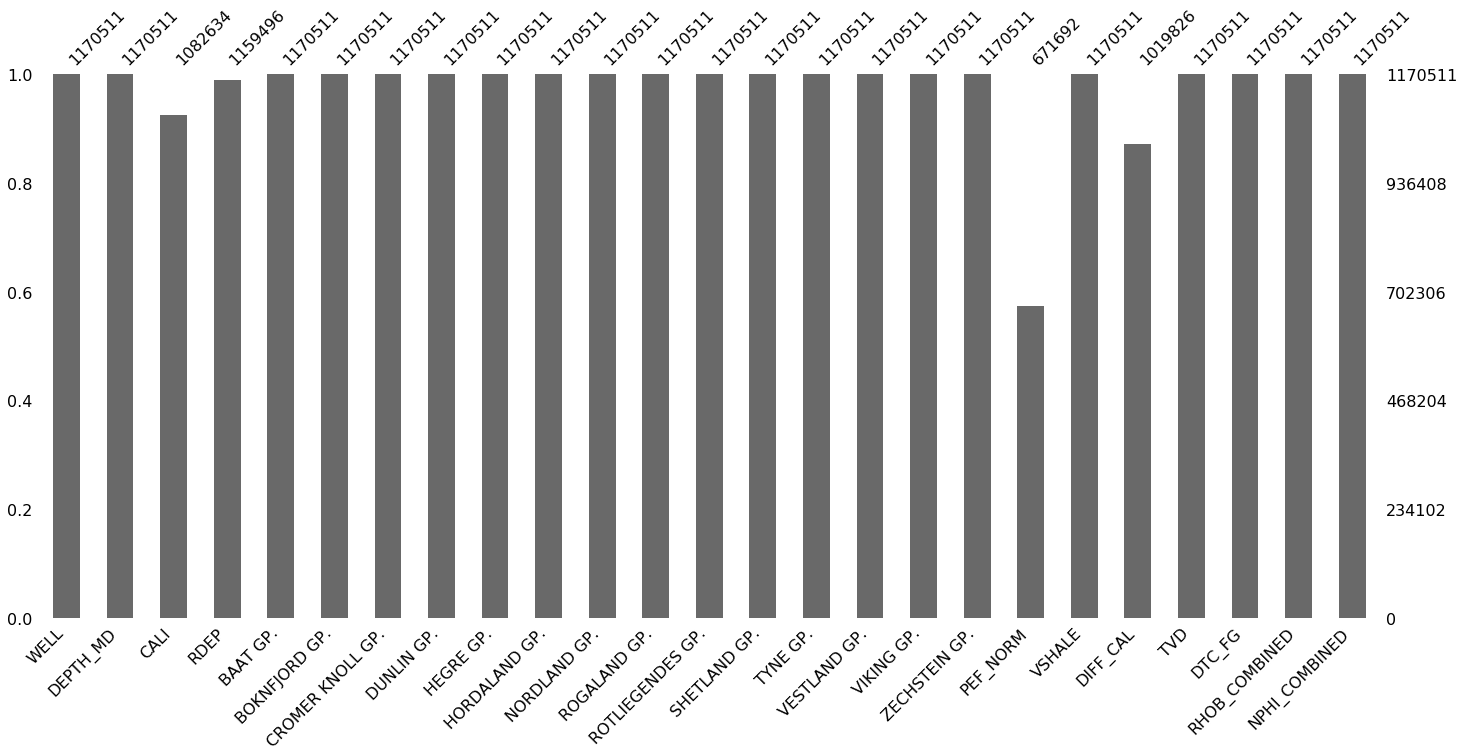

In [121]:
missingno.bar(pef_df)

In [122]:
pef_df.describe()

DEPTH_MD          CALI          RDEP      BAAT GP.  BOKNFJORD GP.  \
count  1.170511e+06  1.082634e+06  1.159496e+06  1.170511e+06   1.170511e+06   
mean   2.184087e+03  1.318568e+01  1.069103e+01  3.060458e-02   2.669774e-03   
std    9.971821e+02  3.798907e+00  1.139480e+02  1.722439e-01   5.160086e-02   
min    1.360860e+02  2.344000e+00  3.170056e-02  0.000000e+00   0.000000e+00   
25%    1.418597e+03  9.429712e+00  9.102396e-01  0.000000e+00   0.000000e+00   
50%    2.076605e+03  1.255575e+01  1.439000e+00  0.000000e+00   0.000000e+00   
75%    2.864393e+03  1.671075e+01  2.557220e+00  0.000000e+00   0.000000e+00   
max    5.436632e+03  2.827900e+01  1.999887e+03  1.000000e+00   1.000000e+00   

       CROMER KNOLL GP.    DUNLIN GP.     HEGRE GP.  HORDALAND GP.  \
count      1.170511e+06  1.170511e+06  1.170511e+06   1.170511e+06   
mean       4.469843e-02  1.017376e-01  1.188626e-02   2.504504e-01   
std        2.066410e-01  3.023031e-01  1.083743e-01   4.332726e-01   
min        0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%        0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
50%        0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
75%        0.000000e+00  0.000000e+00  0.000000e+00   1.000000e+00   
max        1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   

       NORDLAND GP.  ...  VESTLAND GP.    VIKING GP.  ZECHSTEIN GP.  \
count  1.170511e+06  ...  1.170511e+06  1.170511e+06   1.170511e+06   
mean   9.524900e-02  ...  2.231162e-02  1.127704e-01   1.045526e-02   
std    2.935587e-01  ...  1.476951e-01  3.163121e-01   1.017151e-01   
min    0.000000e+00  ...  0.000000e+00  0.000000e+00   0.000000e+00   
25%    0.000000e+00  ...  0.000000e+00  0.000000e+00   0.000000e+00   
50%    0.000000e+00  ...  0.000000e+00  0.000000e+00   0.000000e+00   
75%    0.000000e+00  ...  0.000000e+00  0.000000e+00   0.000000e+00   
max    1.000000e+00  ...  1.000000e+00  1.000000e+00   1.000000e+00   

            PEF_NORM        VSHALE      DIFF_CAL           TVD        DTC_FG  \
count  671692.000000  1.170511e+06  1.019826e+06  1.170511e+06  1.170511e+06   
mean        3.261924  4.756745e-01  5.921446e-01  2.124750e+03  1.116689e+02   
std         3.441035  2.967426e-01  1.392644e+00  9.771439e+02  3.050901e+01   
min        -5.642811  0.000000e+00 -8.694515e+00  1.110860e+02  7.415132e+00   
25%         1.962701  2.362615e-01 -2.457237e-02  1.373382e+03  8.594654e+01   
50%         2.639614  4.575248e-01  2.447357e-01  2.030550e+03  1.062664e+02   
75%         3.896999  7.161328e-01  8.052783e-01  2.804584e+03  1.398887e+02   
max       425.518784  1.000000e+00  1.913762e+01  5.395563e+03  3.204789e+02   

       RHOB_COMBINED  NPHI_COMBINED  
count   1.170511e+06   1.170511e+06  
mean    2.304750e+00   3.701472e-01  
std     2.258588e-01   1.156680e-01  
min     7.209712e-01  -3.582247e-02  
25%     2.149645e+00   2.926093e-01  
50%     2.355011e+00   4.199790e-01  
75%     2.464500e+00   4.425809e-01  
max     3.457820e+00   9.995703e-01  

[8 rows x 24 columns]

In [123]:
pef_df.dropna(inplace=True)

In [124]:
pef_df.drop(pef_df[pef_df.PEF_NORM > 15].index, inplace=True)


In [126]:
pef_df.drop(pef_df[pef_df.PEF_NORM < 1].index, inplace=True)

In [153]:
pef_df.drop(pef_df[pef_df.DIFF_CAL > 2].index, inplace=True)

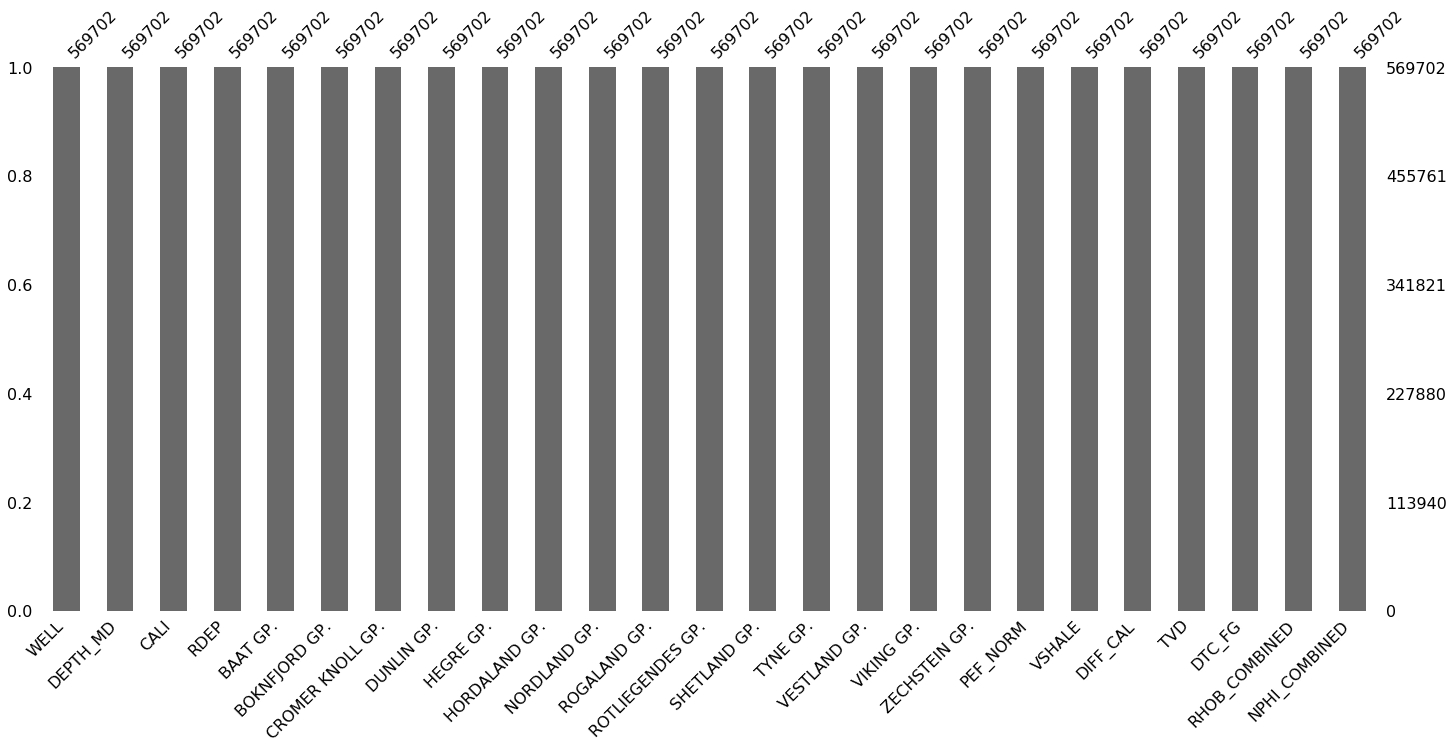

In [154]:
missingno.bar(pef_df)

In [155]:
col_names = ['DTC_FG', 'TVD', 'VSHALE', 'RHOB_COMBINED', 'NPHI_COMBINED']
features = pef_df[col_names]
scaler=StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [156]:
features

array([[ 1.83784968, -2.03837249,  0.46288227, -1.57625389,  0.73388147],
       [ 1.84400184, -2.03820614,  0.404704  , -1.21667553,  0.73388147],
       [ 1.85078545, -2.03803978,  0.37794881, -0.72532783,  0.73388147],
       ...,
       [-0.2684334 ,  0.84166334, -1.0919553 ,  0.32720239,  0.81102172],
       [-0.2684334 ,  0.8418298 , -1.28460517,  0.26876392,  0.77203467],
       [-0.2684334 ,  0.84199599, -1.42909348,  0.2559463 ,  0.77203467]])

In [157]:
pef_df_model = pef_df.loc[:,['DTC_FG', 'TVD', 'VSHALE', 'RHOB_COMBINED', 'NPHI_COMBINED', 'PEF_NORM']]

In [158]:
pef_df_model.describe()

DTC_FG            TVD         VSHALE  RHOB_COMBINED  \
count  569702.000000  569702.000000  569702.000000  569702.000000   
mean      106.826556    2338.464352       0.475804       2.320289   
std        28.562396     913.758571       0.295829       0.235859   
min         7.415132     180.351395       0.000000       1.204448   
25%        83.447786    1599.895385       0.233366       2.127190   
50%       100.118759    2332.221191       0.463400       2.365054   
75%       134.225250    2986.459839       0.713271       2.516731   
max       320.478882    4894.291992       1.000000       3.457820   

       NPHI_COMBINED       PEF_NORM  
count  569702.000000  569702.000000  
mean        0.353889       3.049677  
std         0.120853       1.488028  
min        -0.035822       1.000610  
25%         0.265613       1.954219  
50%         0.373789       2.592851  
75%         0.442581       3.740957  
max         0.999570      14.999122

In [159]:
pef_df_model[col_names] = features

In [160]:
X = pef_df_model.iloc[:,0:5]
y = pef_df_model.iloc[:,-1]

In [161]:
X

DTC_FG       TVD    VSHALE  RHOB_COMBINED  NPHI_COMBINED
42       1.837850 -2.038372  0.462882      -1.576254       0.733881
43       1.844002 -2.038206  0.404704      -1.216676       0.733881
44       1.850785 -2.038040  0.377949      -0.725328       0.733881
45       1.858861 -2.037873  0.428560      -0.878290       0.733881
163      1.839999 -2.018245  0.347684      -1.826727       0.733881
...           ...       ...       ...            ...            ...
1170498 -0.268433  0.841331 -1.266887       0.413736       0.772035
1170499 -0.268433  0.841497 -1.089272       0.373121       0.811022
1170500 -0.268433  0.841663 -1.091955       0.327202       0.811022
1170501 -0.268433  0.841830 -1.284605       0.268764       0.772035
1170502 -0.268433  0.841996 -1.429093       0.255946       0.772035

[569702 rows x 5 columns]

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [163]:
model_PEF_LR=LinearRegression()

In [164]:
model_PEF_LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [165]:
y_pred_PEF_LR = model_PEF_LR.predict(X_test)

(0, 10)

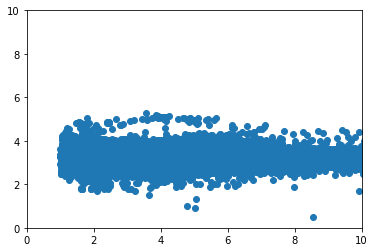

In [166]:
plt.scatter(y_test, y_pred_PEF_LR)
plt.xlim(0,10)
plt.ylim(0,10)

In [180]:
model_PEF_RFR = RandomForestRegressor(n_estimators = 10, max_depth=200, bootstrap=True)
model_PEF_RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=200,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [181]:
y_pred_PEF_RFR = model_PEF_RFR.predict(X_test)

(0, 30)

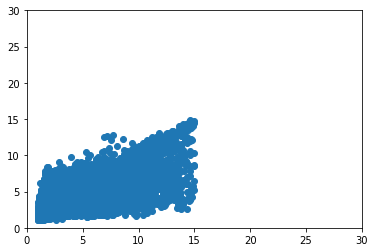

In [182]:
plt.scatter(y_test, y_pred_PEF_RFR)
plt.xlim(0,30)
plt.ylim(0,30)

In [170]:
model_PEF_RFR.feature_importances_

array([0.16755572, 0.36752563, 0.14505363, 0.19306139, 0.12680362])

In [183]:
pickle.dump(model_PEF_RFR, open('model_PEF_RFR.pkl', 'wb'))

In [171]:
model_PEF_XGBR = XGBRegressor()
model_PEF_XGBR.fit(X_train, y_train)

C:\Users\BANAMZ\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:48:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [172]:
y_pred_PEF_XGB = model_PEF_XGBR.predict(X_test)

(0, 10)

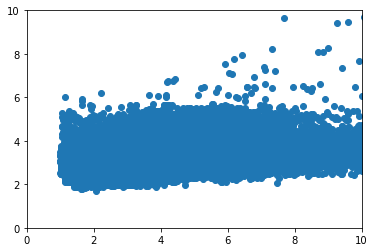

In [173]:
plt.scatter(y_test, y_pred_PEF_XGB)
plt.xlim(0,10)
plt.ylim(0,10)

In [174]:
model_PEF_MLP = MLPRegressor(hidden_layer_sizes=(10,10,10), max_iter=1000)

In [175]:
model_PEF_MLP.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
             learning_rate_init=0.001, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [176]:
y_pred_PEF_MLP = model_PEF_MLP.predict(X_test)

(0, 10)

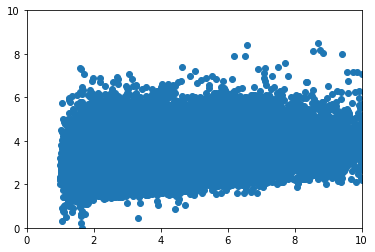

In [177]:
plt.scatter(y_test, y_pred_PEF_MLP)
plt.xlim(0,10)
plt.ylim(0,10)

In [185]:
print(f'RMSE on Test Data for LR: {mean_squared_error(y_test, y_pred_PEF_LR)**0.5}')
print(f'RMSE on Test Data for RFR: {mean_squared_error(y_test, y_pred_PEF_RFR)**0.5}')
print(f'RMSE on Test Data for XGBR: {mean_squared_error(y_test, y_pred_PEF_XGB)**0.5}')
print(f'RMSE on Test Data for XGBR: {mean_squared_error(y_test, y_pred_PEF_MLP)**0.5}')

RMSE on Test Data for LR: 1.4683500533045049
RMSE on Test Data for RFR: 0.8258804005254924
RMSE on Test Data for XGBR: 1.3348344733152484
RMSE on Test Data for XGBR: 1.294015506202197


In [184]:
names = X.columns
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), model_PEF_RFR.feature_importances_), names), 
             reverse=True))

Features sorted by their score:
[(0.3678, 'TVD'), (0.1914, 'RHOB_COMBINED'), (0.169, 'DTC_FG'), (0.1457, 'VSHALE'), (0.1261, 'NPHI_COMBINED')]
